# 4.1.13 Partial Least Squares Regression (PLS)


## Explanation of Partial Least Squares Regression and Its Applications

**Partial Least Squares Regression (PLS)** is a statistical method that combines features of principal component analysis and multiple regression. It is particularly useful when the predictors are highly collinear or when the number of predictors exceeds the number of observations.

## **Key Concepts**:
- **Latent Variables**: PLS creates new predictor variables, known as latent variables, which are linear combinations of the original predictors.
- **Maximizing Covariance**: Unlike PCA, which focuses on explaining the variance in the predictors, PLS focuses on finding latent variables that maximize the covariance between predictors and the response variable.
- **Dimensionality Reduction**: PLS reduces the dimensionality of the data while maintaining the relationship between predictors and the response.

In this section, we will explore the implementation of Partial Least Squares Regression using scikit-learn.


## Procedure for Partial Least Squares Regression (PLS)

1. **Standardize the Data**:
   Standardizing the predictors to have mean zero and variance one.

2. **Select the Number of Components**:
   Choose the number of latent variables (components) to include in the model.

3. **Fit the PLS Model**:
   Use the training data to fit the PLS model, extracting the latent variables that best explain the relationship between the predictors and the response.

4. **Predict and Evaluate**:
   Use the fitted model to make predictions and evaluate its performance using appropriate metrics such as Mean Squared Error (MSE) or R-squared.


<hr><hr>

## Principle, Formulas, and Terms in Partial Least Squares Regression (PLS)

### Principle of Partial Least Squares Regression

Partial Least Squares Regression (PLS) aims to find the directions (latent variables) in the predictor space that explain the maximum variance in the response variable. It seeks to maximize the covariance between the predictors and the response by projecting the original data into a new space defined by these latent variables. The primary goal is to extract the relevant information from the predictors that is most useful for predicting the response.

### Formulas and Terms

1. **Latent Variables**: \( T \) and \( U \)
   - $ T = XW $ : Latent variables for predictors.
   - $ U = YC $ : Latent variables for response.


2. **Weight Vectors**: \( W \)
   - \( W \) are the weight vectors that define the linear combinations of the original predictors to form the latent variables.


3. **Loading Matrices**: \( P \) and \( Q \)
   - \( P \) and \( Q \) are the loading matrices for \( X \) and \( Y \), respectively.


4. **Regression Coefficients**: \( B \)
   - $ B = W \left( P^T W \right)^{-1} Q^T $
   - The regression coefficients \( B \) relate the predictors to the response in the latent space.

5. **Deflation**: Removing the information explained by each latent variable from the original predictors and response.

___

### Example

Consider a dataset with three predictors $ X_1 $, $ X_2 $, and $ X_3 $, and a response variable $ Y $. The relationship can be described as:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon $$

Using PLS, we aim to find new variables $ T_1 $ and $ T_2 $  (latent variables) that capture the relevant information from $ X $ for predicting $ Y $.

1. **Standardize the Predictors**: 
   Standardize $ X $ to have mean zero and variance one.

2. **Calculate Weight Vectors**:
   Find weight vectors $ W_1 $ and $ W_2 $ that define the linear combinations of $ X $ to form $ T_1 $ and $ T_2 $.

   $$ T_1 = W_1^T X $$
   $$ T_2 = W_2^T X $$

3. **Deflate the Predictors**:
   Remove the information explained by $ T_1 $ from $ X $:

   $$ X_{\text{deflated}} = X - T_1 P_1^T $$

4. **Repeat for \( T_2 \)**:
   Perform the same steps for $ T_2 $ to obtain the final latent variables.

5. **Fit the PLS Model**:
   Use the latent variables $ T_1 $ and $ T_2 $ to predict $ Y $:

   $$ Y \approx T_1 Q_1 + T_2 Q_2 $$

6. **Regression Coefficients**:
   Calculate the regression coefficients \( B \) using:

  $$ B = W \left( P^T W \right)^{-1} Q^T $$
___
### Example Calculation

Let's assume the following standardized predictors and response:

$$ X = \begin{bmatrix} 0.5 & -0.2 & 0.1 \\ -0.1 & 0.4 & -0.3 \\ 0.3 & -0.1 & 0.2 \end{bmatrix} $$
$$ Y = \begin{bmatrix} 1.2 \\ 0.8 \\ 1.1 \end{bmatrix} $$

1. **Weight Vector Calculation**:
   Calculate $ W_1 $ and $ W_2 $.

2. **Latent Variables**:
   $$ T_1 = W_1^T X $$
   $$ T_2 = W_2^T X_{\text{deflated}} $$

3. **Predict and Evaluate**:
   Use $ T_1 $ and $ T_2 $ to predict $ Y $ and evaluate the performance using metrics such as MSE and $ R^2 $.

In summary, PLS regression provides a robust framework for dealing with multicollinear and high-dimensional data by extracting latent variables that capture the essential information from the predictors for predicting the response.


<hr><hr>

### Readings:
- [Partial Least Squares](https://readmedium.com/en/https:/towardsdatascience.com/partial-least-squares-f4e6714452a)
- [Partial Least Squares (PLS) Regression - The University of Texas at Dallas](https://personal.utdallas.edu/~herve/Abdi-PLS-pretty.pdf)
- [An Introduction to Partial Least Squares Regression, SAS Institute](https://stats.oarc.ucla.edu/wp-content/uploads/2016/02/pls.pdf)
- [Sklearn | Partial Least Squares Regression](https://towardsdev.com/sklearn-partial-least-squares-regression-plsregression-e513c0bd344d)
- [Predictive Regression using splines, partial-least squares, penalization, cross-validation, and model averaging](https://blog.devgenius.io/predictive-regression-using-splines-partial-least-squares-penalization-cross-validation-and-339b74a7e108)
  
___
___

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generating some random data for demonstration
np.random.seed(0)
n_samples = 100
n_features = 3
X = np.random.rand(n_samples, n_features)  # Random features
Y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + X[:, 2] + np.random.randn(n_samples)  # Linear combination with noise

In [3]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Implementing Partial Least Squares Regression using scikit-learn
n_components = 2  # Number of PLS components
pls = PLSRegression(n_components=n_components)
pls.fit(X_scaled, Y)

PLSRegression()

In [5]:
# Predicting
Y_pred_pls = pls.predict(X_scaled).ravel()

# Evaluating the model
mse = mean_squared_error(Y, Y_pred_pls)
r2 = r2_score(Y, Y_pred_pls)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8649554431487241
R-squared: 0.5596319598411288


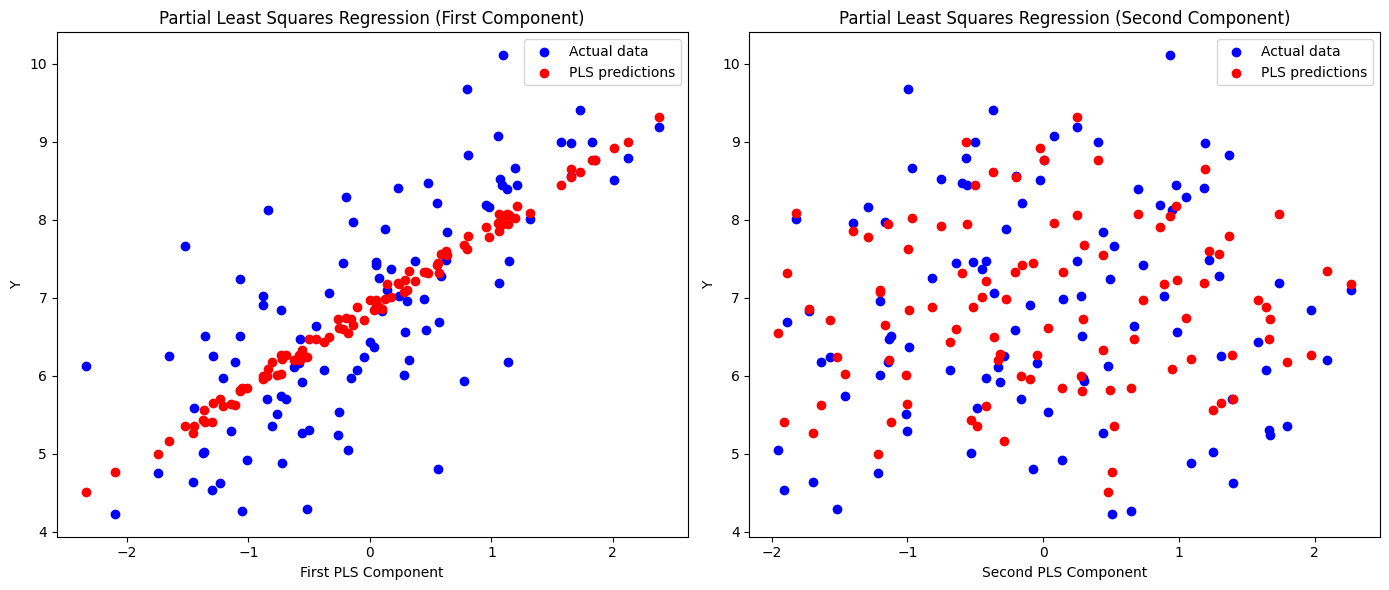

In [6]:
# Plotting the results (for demonstration, we'll plot against the first and second components)
plt.figure(figsize=(14, 6))

# Plot for the first component
plt.subplot(1, 2, 1)
plt.scatter(pls.x_scores_[:, 0], Y, color='blue', label='Actual data')
plt.scatter(pls.x_scores_[:, 0], Y_pred_pls, color='red', label='PLS predictions')
plt.xlabel('First PLS Component')
plt.ylabel('Y')
plt.title('Partial Least Squares Regression (First Component)')
plt.legend()

# Plot for the second component
plt.subplot(1, 2, 2)
plt.scatter(pls.x_scores_[:, 1], Y, color='blue', label='Actual data')
plt.scatter(pls.x_scores_[:, 1], Y_pred_pls, color='red', label='PLS predictions')
plt.xlabel('Second PLS Component')
plt.ylabel('Y')
plt.title('Partial Least Squares Regression (Second Component)')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

Partial Least Squares Regression (PLS) is a powerful method for handling datasets with multicollinearity and high-dimensional data. By extracting latent variables that maximize the covariance between predictors and the response variable, PLS provides a robust and interpretable model. Implementing PLS using scikit-learn is straightforward and efficient, making it a practical choice for various applications. Proper selection of the number of components is crucial for optimizing the model's performance and achieving accurate predictions.
